The reduced chi-squared value of our initial parameter guess is 2.5076210219817305 for a slope of 1.2 and an intercept of 0.5
The minimum value of reduced chi-squared is 0.8647975457609353
The optimal slope to describe the data is 1.47 while the optimal intercept is 0.36
The optimized reduced chi-squared value along with it's corresponding slope and intercept differ significantly from our intial guess.


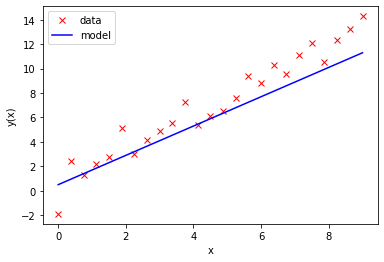

In [62]:
# writing script for implementation of least squares optimization pertaining to questions 1.(a) to 1.(f) in the assignment 

# importing relevant functions
import numpy as np
import matplotlib.pyplot as plt
import math

# loading data file, who's data points we will curve fit
data_file = np.loadtxt('data_points_assign5.txt', float)

# partisoning comma seperated data in terms of the independant variable data, x, ad+nd the dependant variable data, y.
x = data_file[:,0]
y_data = data_file[:,1]

# defining a linear model function which takes the independant variable data points and specified linear parameters...
# ... and returns resultant y-values corresponding to the specified linear model.
def linear_model(x, param):
    slope, intercept = param
    result = slope*x + intercept
    return result

# defining an initial guess for optimized slope and intercept parameters of the data
slope0, intercept0 = 1.2, 0.5

# obtaining y-model values from this initial guess
y_model = linear_model(x, (slope0,intercept0))

# defining reduced chi-squared function, taking expected y-values (model) and observed y-values (data)
def chi_squared_reduced(expected, observed, uncertainty=1):
    # computing and returning chi-squared value for given expected y-values
    result = (observed-expected)/uncertainty
    return np.sum(result**2)/len(observed)

# computing reduced chi-squared value for initial guess
chi0 = chi_squared_reduced(y_model, y_data)
print('The reduced chi-squared value of our initial parameter guess is', chi0, 'for a slope of 1.2 and an intercept of 0.5')

# creating array of slope and intercept values to iterate through for optimization 
intercept_seq = np.linspace(0,3,101)
slope_seq = np.linspace(0,3,101)

# creating array (filled with place holder ones) to store chi-squared values for different slope and intercept values...
# ... where the matrix indices correspond to the intercept and slope values.
chi2 = -np.ones([len(intercept_seq), len(slope_seq)])

# enumerating through intercept values 
for indx, intercept in enumerate(intercept_seq):
    # enumerating through slope values (for fixed intercept value)
    for jndx, slope in enumerate(slope_seq):
        # computing linear model y-values for given set of intercept/slope values
        y_optmized = linear_model(x, (slope, intercept))
        # computing and storing corresponding reduced chi-squared value in chi2 matrix
        chi2[indx,jndx] = chi_squared_reduced(y_optmized, y_data)


# finding the minimum value of reduced chi-squared
index = np.unravel_index(np.argmin(chi2, axis=None), chi2.shape)
print('The minimum value of reduced chi-squared is', chi2[index])

# finding the slope and intercept parameters corresponding to the reduced chi-squared minimum 
print('The optimal slope to describe the data is', slope_seq[index[1]], 'while the optimal intercept is', intercept_seq[index[0]])

print("The optimized reduced chi-squared value along with it's corresponding slope and intercept differ significantly from our intial guess.")

# plotting data points as well as linear model of initial parameter guess
# plotting instructions
plt.figure()
plt.plot(x,y_data,'rx', label='data')
plt.plot(x,y_model, 'b', label='model')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

The figure above displays the data points from the file data_points_assign5.txt along with an initial 'guess' linear model to describe the data. The linear parameters which were employed in this model were: a slope of 1.2 and intercept of 0.5.

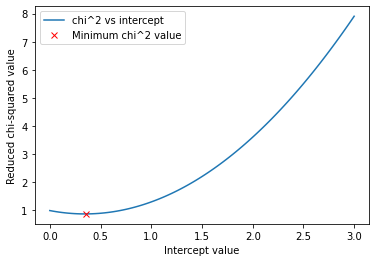

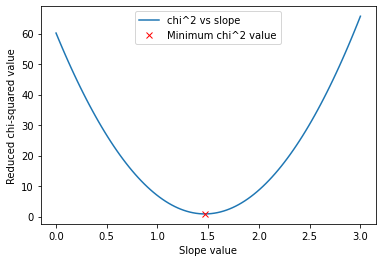

In [63]:
# plotting reduced chi-squared as function of intercept_seq and slope_seq according to step 1.2 g) in the assignment...
# ... as well as labeling global minimums for both functions 

# plotting instructions
plt.figure()
plt.plot(intercept_seq, chi2[0:, index[1]], label='chi^2 vs intercept')
plt.plot(intercept_seq[index[0]], min(chi2[0:, index[1]]), 'rx', label='Minimum chi^2 value')
plt.xlabel('Intercept value')
plt.ylabel('Reduced chi-squared value')
plt.legend()

#plotting instructions
plt.figure()
plt.plot(slope_seq, chi2[index[0], 0:], label='chi^2 vs slope')
plt.plot(slope_seq[index[1]], min(chi2[index[0], 0:]), 'rx', label='Minimum chi^2 value')
plt.xlabel('Slope value')
plt.ylabel('Reduced chi-squared value')
plt.legend()

The preceeding two plots display, in sequential order, the reduced chi-squared values as a function of intercept where the slope is held constant at it's optimal value and the reduced chi-squared values as a function of slope where the intercept is held constant at it's optimal value. Furthermore, on each plot the minimum is denoted by a red 'x', this point corresponds to the optimized value (slope or intercept) for the reduced chi squared. That is to say that at this point the reduced chi-squared value is at a minimum and as such the slope and intercept coordinate of this optimal point correspond to the best parameters for a linear model of our data. 

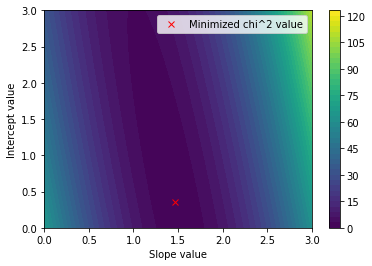

In [64]:
# writing script to make a contour diagram of slopes versus intercepts as described in step 1.2 h)

# creating meshgrid using slope and intercept values 
xx, yy = np.meshgrid(slope_seq, intercept_seq)

# plotting color diagram of slopes versus intercepts with colourful contour lines that indicate how large the reduced...
# ...chi-squared value is.
# plotting instruction 
plt.figure()
plt.contourf(xx, yy, chi2, levels=np.arange(0,125,3))
plt.plot(slope_seq[index[1]], intercept_seq[index[0]], 'rx', label='Minimized chi^2 value')
plt.colorbar()
plt.xlabel('Slope value')
plt.ylabel('Intercept value')
plt.legend()

The preceeding figure is a contour map that displays slopes versus intercepts from our optimization problem, where the colored contour lines indicate how large the reduced chi-squared value is for a given slope and intercept. The minima of this contour map is denoted by a red 'x'. The coordinates of this point correspond to the optimized slope and intercept values for the linear model of our data.

[1.46594951 0.3643417 ]


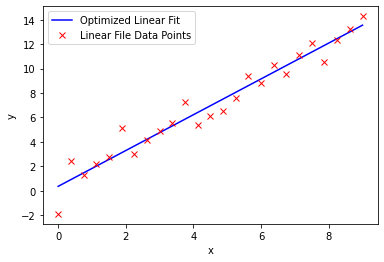

In [65]:
# writing scrpit to explore curve fitting using scipy.optimize package according to step 2 (steps 2.a through 2.b)

# beginning by curve fitting data_points_assign5.txt using Nelder-Mead
# importing relevant functions  

from scipy.optimize import minimize 

# defining function to minimize
# function computes the reduced chi-squared value directly for a set of slope & intercept values by employing...
# ... previously defined linear_model and chi_squared_reduced functions
def f(param, args=(x)):
    y_optmized = linear_model(x, param)
    result = chi_squared_reduced(y_optmized, y_data)
    return result

# using previously specified parameter guess: slope0 and intercept0 as initial guess for optimized parameters 
param0 = np.array([slope0, intercept0])

# calling minimize function from scipy.optimize with objective function and initial solution guess 
res = minimize(f, param0, method='Nelder-Mead')

# obtaining y values corresponding to y=mx+b where m and b are obtained from res
y_package = linear_model(x, tuple(res.x))

# plotting model fit along with data
# plotting instructions
plt.figure()
plt.plot(x, y_package, color='blue', label='Optimized Linear Fit')
plt.plot(x, y_data, 'rx', label='Linear File Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The preceeding figure displays the data points from the file data_points_assign5.txt along with the optimized linear fit to the data as determined using scipy.optimize.minimize. The parameters of this optimized fit are found to be 1.47 and 0.36 for the slope and y-intercept respectively. 

[2.29261758 0.49628151]


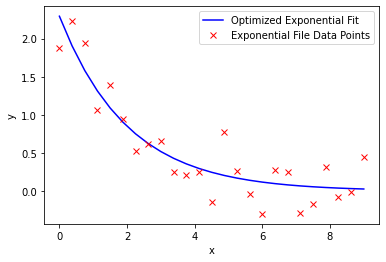

In [66]:
# writing scrpit to further explore curve fitting using scipy.optimize package according to step 2.(c)
# curve fitting data_points_exp_assign5.txt using Nelder-Mead

# loading data from data_points_exp_assign5.txt
data_file = np.loadtxt('data_points_exp_assign5.txt', float)
x = data_file[:,0]
y_data = data_file[:,1]

# defining exponential model function
def exp_model(x, param):
    D, b = param
    result = D*np.exp(-b*x)
    return result

# defining initial guess for optimized parameters of exponential model
D0, b0 = 1, 1

# defining function to minimize
# function computes the reduced chi-squared value directly for a set of D & b values by employing...
# ... using the previously defined exp_model and chi_squared_reduced functions
def f(param, args=(x)):
    y_optmized = exp_model(x, param)
    result = chi_squared_reduced(y_optmized, y_data)
    return result

# using previously specified parameter guess: D0 and b0 as initial guess for optimized parameters 
param0 = np.array([D0, b0])

# calling minimize function from scipy.optimize with objective function f, and initial solution guess param0, passed in 
res = minimize(f, param0, method='Nelder-Mead')

# obtaining y values corresponding to y=D*exp(-bx) where D and b are obtained from res
y_package = exp_model(x, tuple(res.x))

# plotting model fit along with data
# plotting instructions
plt.figure()
plt.plot(x, y_package, color='blue', label='Optimized Exponential Fit')
plt.plot(x, y_data, 'rx', label='Exponential File Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

The preceeding figure displays the data points from the file data_points_exp_assign5.txt along with the optimized exponential fit to the data as determined using scipy.optimize.minimize. The parameters of this optimized fit are found to be 2.29 and 0.50 for the exponential amplitude and power parameters respectively. 

The Half life of Barium 137 is 2.836203074149333 minutes.


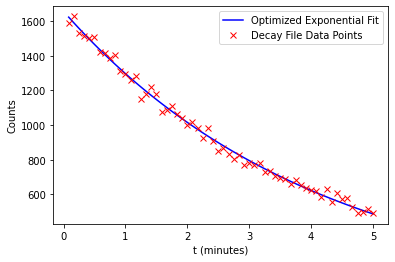

In [67]:
# writing scrpit to further explore curve fitting using scipy.optimize package according to step 2.(d)

# Finding the half-life of Barium-137
# curve fitting decay.txt using Nelder-Mead

# loading data from data_points_exp_assign5.txt
data_file = np.loadtxt('decay.txt', float)
t = data_file[:,0]
N = data_file[:,1]

# defining exponential model function
def exp_model(t, param):
    N0, tau = param
    result = N0*np.exp(-t/tau)
    return result

# defining initial guess for optimized parameters of exponential model
N0, tau0 = 1, 1

# defining function to minimize
# function computes the reduced chi-squared value directly for a set of N & tau values by employing...
# ... using the previously defined exp_model and chi_squared_reduced functions
def f(param, args=(t)):
    y_optmized = exp_model(t, param)
    result = chi_squared_reduced(y_optmized, N)
    return result

# using previously specified parameter guess: N0 and tau0 as initial guess for optimized parameters 
param0 = np.array([N0, tau0])

# calling minimize function from scipy.optimize with objective function f, and initial solution guess 
res = minimize(f, param0, method='Nelder-Mead')

# obtaining y values corresponding to y=D*exp(-bx) where D and b are obtained from res
y_package = exp_model(t, tuple(res.x))

# plotting model fit along with data 
# plotting instructions
plt.figure()
plt.plot(t, y_package, color='blue', label='Optimized Exponential Fit')
plt.plot(t, N, 'rx', label='Decay File Data Points')
plt.xlabel('t (minutes)')
plt.ylabel('Counts')
plt.legend()

print('The Half life of Barium 137 is', res.x[1]*math.log(2), 'minutes.')

The preceeding figure displays the data points from the file decay.txt along with the optimized exponential fit to the data as determined using scipy.optimize.minimize. We can clearly see that the Barium 137 decay follows an exponential model given it's close fit to the optimized curve. From the optimized $\tau$ parameter (exponential parameter) we were able to compute the half-life of Barium 137. The relation between $\tau$ and the half-life, $t_{1/2}$, is given by $\tau = t_{1/2}/\ln(2)$, where our optimized $\tau$ parameter is 4.09 minutes. Solving for $t_{1/2}$ we find the half life of Barium to be $\approx2.84$ minutes. The optimized amplitude parameter for this decay is $N_0=1656$

The mass of the object as determined by the curve fit is m = 0.18101241730790713 while the rotational radius of the object is found to be R = 0.1629111755771164
Finally, the optimized power for the polynomial model is p = 2.011537802284475 as anticipated.


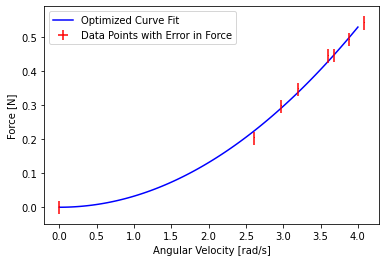

In [60]:
# writing script to explore scipy.optimize for fitting data using curve_fit according to step 2.(e) in the assignment
# Centripetal force curve fitting

# importing relevant functions 
from scipy.optimize import curve_fit

# loading data from centripetal.txt
data_file = np.loadtxt('centripetal.txt', float)

# segregating comma seperated data
omega = data_file[:,0]
force = data_file[:,1]
error = data_file[:,2]

#sorting data lists
omega.sort()
force.sort()

# defining a polynomial model function, whose parameters will be optimized using curve_fit...
# ... naming model function 'quad_model' in anticipation of the quadratic behavior describing the centripetal data
def quad_model(omega, coeff, p):
    result = coeff*omega**p
    return result

# calling curve_fit function with the object function 'quad_model', the x-data 'omega', the y-data, 'force'...
# ... and the initial parameters guess [1,2] where 1 is the coefficient guess and 2 is the power guess
params, extra = curve_fit(quad_model, omega, force, [1, 2], sigma=error)

# assigning the optimized parameters from the params array to their respective variable names
coeff = params[0]
p = params[1]

# printing the mass and rotational radius of the object as well as the optimal power for the polynomial model...
# ... which were all determined by the curve fit 
print('The mass of the object as determined by the curve fit is m =', coeff/0.18, 'while the rotational radius of the object is found to be R =', coeff/0.2)
print('Finally, the optimized power for the polynomial model is p =', p, 'as anticipated.')


# creating finer scale omega list to excenuate the quadratic behavior of the centrifugal.txt data points
omega_fine_grain = np.linspace(0, 4, 100)

# plotting model fit along with data 
# plotting instructions
plt.figure()
plt.plot(omega_fine_grain, quad_model(omega_fine_grain, coeff, p), color = 'blue', label = 'Optimized Curve Fit')
plt.errorbar(omega, force, 0.0196, 0, 'r,', label = 'Data Points with Error in Force')
plt.xlabel('Angular Velocity [rad/s]')
plt.ylabel('Force [N]')
plt.legend()

The preceding figure displays the data points from the centripetal.txt file along with the optimized fit to the data as determined using scipy.optimize.minimize. Error bars are denoted in red and displayed for the error in the force. The optimized power parameter for the curve fit to the data is 2.01, as such we can conclude that the quadratic model is best suited for describing the centripetal force data. Furthermore, the optimized coefficient parameter was found to be 0.033 kgm. Given that the theoretical model for the centripetal force is $F_c=mR\omega^2$ and the rotating object utilized in collecting the data had a mass of $m=0.2$ kg and a radius of rotation of $R=0.18$ meters we would expect a theoretical value for the coefficienct paramter to be 0.036 kgm. As such we can conclude that this theoretical value for the coefficient is consistent with our optimized parameter of 0.033 kgm.     

[Text(0.5, 0, 'Position [m]'), Text(0, 0.5, 'Absolute Error [V]')]

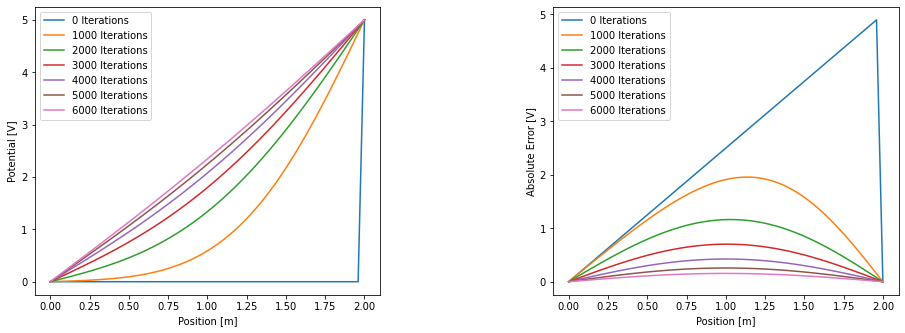

In [9]:
# The code in this cell executes the tasks outlined in section 3 of the assignment

# creating a constant called N to be used to discretize the space and potential
N = 100

# constants that will be used to create the 'discretized' x-axis
x_min = 0
x_max = 2

# constants that will be used to create the array of potential
V_min = 0
V_max = 5

# using numpy linspace function to create an array of N evenly spaced x values
x = np.linspace(x_min, x_max, N)

# Create Array of potential values 
Vavg = np.linspace(V_min, 0, N-1)
Vavg = np.append(Vavg,V_max)

# Create Array of evenly spaced values
V_theor = np.linspace(0,5,100)

#initializing plots
fig, axs = plt.subplots(1, 2)

# Iterating through the numerical solution for 3.b) until it converges to the analytical solution
for i in range(6001):
    # Slice arrays into neighbours as specified
    V1 = Vavg[0::2]
    V2 = Vavg[1::2]

    # Double all values
    V1sum = np.repeat(V1, 2)
    V2sum = np.repeat(V2, 2)

    # Remove boundary values from arrays
    V1sum = np.delete(V1sum, 0)
    V1sum = np.delete(V1sum, -1)

    V2sum = np.delete(V2sum, 0)
    V2sum = np.delete(V2sum, -1)

    # Average all neighbours using rule, according to Equation 26
    V1sum = np.reshape(V1sum, (49,2))
    avg1 = np.mean(V1sum, 1)

    V2sum = np.reshape(V2sum, (49,2))
    avg2 = np.mean(V2sum, 1)

    # Concatenate the lists and restore boundary values to complete the list
    Vavg = np.concatenate((avg1,avg2))
    Vavg = np.append(Vavg, 5.0)
    Vavg = np.insert(Vavg, 0, 0.0)
    Vavg = np.sort(Vavg)
        
    # condition to make a plot every 1000 iterations
    # This is done so that we can see the progression as the plot converges 
    # towards the desired result
    if i % 1000 == 0:
        
        # plotting instructions for the Potential
        axs[0].plot(x, Vavg, label = str(i)+" Iterations")

        # instructions to create a new plot to keep track of the error

        error=[]
        for j in range(len(Vavg)):
            step_error = abs(Vavg[j]-V_theor[j])
            error.append(step_error)
                  
        axs[1].plot(x, error, label = str(i)+" Iterations")
        

# plotting instructions
plt.subplots_adjust(0, 0, 2, 1, 0.5, 0.5)

axs[0].legend(loc="upper left")
axs[0].set(xlabel='Position [m]', ylabel='Potential [V]')

axs[1].legend(loc="upper left")
axs[1].set(xlabel='Position [m]', ylabel='Absolute Error [V]')

The left figure illustrates the potential converging to fit the linear relation V(x) = ax + b. By experimenting we found this to happen around 5000 to 6000 iterations. On iterations divisible by 1000 we plotted the array with potential vs position showing the relation becoming more linear at each step. In the right figure we plotted the difference between the current potential and the theoretical potential (absolute error) on iterations divisible by 1000. We see that the error present approaches zero for higher iterations, evident by the lower arching curves in the figure.